# Telecom - ML project 

## Business Task and Work Plan


**Business Task and Work Plan**

The telecommunications operator **“TeleDom”** wants to combat customer churn. To address this, the company plans to offer promo codes and special conditions to customers who intend to terminate their contracts. 

To proactively identify such users, TeleDom needs a model that can predict whether a customer will terminate their contract. The company's team has collected personal data about some customers, as well as information about their plans and services.

---

**Service Description**
The operator provides two main types of services:
1. **Landline Telephone Services**:
   - The phone can be connected to multiple lines simultaneously.
2. **Internet**:
   - The connection can be of two types: via a telephone line (**DSL** – Digital Subscriber Line) or fiber optic cable (**Fiber optic**).

Additional services include:
- **Internet Security**:
  - Antivirus software (**DeviceProtection**) and blocking unsafe websites (**OnlineSecurity**).
- **Dedicated Technical Support Line** (**TechSupport**).
- **Cloud Storage**:
  - File backup storage (**OnlineBackup**).
- **Streaming Services**:
  - Streaming TV (**StreamingTV**) and a movie catalog (**StreamingMovies**).

Customers can pay for services on a monthly basis or sign a contract for 1–2 years. Various payment methods are available, along with the option to receive an electronic bill.

---

**Objective:**
The primary goal of the project is to train a model to predict customer churn.

---

**Criteria:**
The target feature is **customer churn** (`churn`).

---

**Work Plan**:
1. **Data Loading**:
   - Import datasets for analysis.
   - Import libraries.
  
2. **Data Preprocessing**:
   - Clean the data to handle missing values and remove duplicates.
   - Convert data types as necessary.
   - Merge datasets.

3. **Exploratory Data Analysis**:
   - Perform correlation analysis.

4. **Model Building and Selection**:
   - Train and evaluate models to choose the best one.

5. **Feature Importance Analysis**:
   - Determine the most influential features.

6. **Customer Segmentation and Recommendations**:
   - Develop customer segmentation strategies and recommendations.

7. **Final Conclusions**:
   - Summarize the results and key findings.

---

**Datasets**:

1. **contract_new.csv**: Information about contracts.
2. **personal_new.csv**: Personal data of customers.
3. **internet_new.csv**: Information about internet services.
4. **phone_new.csv**: Information about telephony services.


## Loading Data

### Import Libraries

In [7]:
!pip install phik -q


In [8]:
!pip install shap -q


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import phik
from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import (OneHotEncoder,  
                                   StandardScaler,
                                   MinMaxScaler
                                   )

from sklearn.model_selection import  RandomizedSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import (
                confusion_matrix,
                 roc_auc_score
             ) 
import shap
import warnings
warnings.filterwarnings("ignore", message=".*keepdims.*", category=FutureWarning)

### Constants

In [11]:
RANDOM_STATE = 251124
TEST_SIZE = 0.25

### Import Datasets

In [13]:
# contract info 
pth1_contract = 'contract_new.csv'
pth2_contract = '/datasets/contract_new.csv'

# clinet personal info 
pth1_personal = 'personal_new.csv'
pth2_personal = '/datasets/personal_new.csv'

# internet services info 
pth1_internet = 'internet_new.csv'
pth2_internet = '/datasets/internet_new.csv'

# phone services info 
pth1_phone = 'phone_new.csv'
pth2_phone = '/datasets/phone_new.csv'

# reading files 
if os.path.exists(pth1_contract):
    df_contract = pd.read_csv(pth1_contract)
elif os.path.exists(pth2_contract):
    df_contract = pd.read_csv(pth2_contract)
else:
    print('Something is wrong with contract_new.csv')

if os.path.exists(pth1_personal):
    df_personal = pd.read_csv(pth1_personal)
elif os.path.exists(pth2_personal):
    df_personal = pd.read_csv(pth2_personal)
else:
    print('Something is wrong with personal_new.csv')

if os.path.exists(pth1_internet):
    df_internet = pd.read_csv(pth1_internet)
elif os.path.exists(pth2_internet):
    df_internet = pd.read_csv(pth2_internet)
else:
    print('Something is wrong with internet_new.csv')


if os.path.exists(pth1_phone):
    df_phone = pd.read_csv(pth1_phone)
elif os.path.exists(pth2_phone):
    df_phone = pd.read_csv(pth2_phone)
else:
    print('Something is wrong with phone_new.csv')


### Initial Data Inspection

Let's Examine the Dataset: contract_new.csv

In [16]:
df_contract.head(2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84


Convert to lowercase and rename the columns

In [18]:
df_contract.columns = df_contract.columns.str.lower()

In [19]:
df_contract = df_contract.rename(columns=
                                     {'customerid': 'customer_id',
                                      'begindate': 'begin_date',
                                      'enddate': 'end_date', 
                                      'paperlessbilling': 'paperless_billing',
                                      'paymentmethod': 'payment_method',
                                      'monthlycharges': 'monthly_charges',
                                      'totalcharges': 'total_charges'}) 
df_contract.head(1)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04


Next examine the dataset personal_new.csv

In [21]:
df_personal.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


Convert to lowercase and rename the columns

In [23]:
df_personal.columns = df_personal.columns.str.lower()

In [24]:
df_personal = df_personal.rename(columns=
                                     {'customerid': 'customer_id',
                                      'seniorcitizen': 'senior_citizen'}) 
df_personal.head(1)

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No


Examine the dataset internet_new.csv

In [26]:
df_internet.head(2)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No


Convert to lowercase and rename the columns

In [28]:
df_internet.columns = df_internet.columns.str.lower()

In [29]:
df_internet = df_internet.rename(columns=
                                     {'customerid': 'customer_id',
                                      'internetservice': 'internet_service',
                                      'onlinesecurity': 'online_security', 
                                      'onlinebackup': 'online_backup',
                                      'deviceprotection': 'device_protection',
                                      'techsupport': 'tech_support',
                                      'streamingtv': 'streaming_tv',
                                       'streamingmovies' : 'streaming_movies'}) 
df_internet.head(1)

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No


Examine the last dataset phone_new.csv

In [31]:
df_phone.head(2)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No


Convert to lowercase and rename the columns

In [33]:
df_phone.columns = df_phone.columns.str.lower()

In [34]:
df_phone = phone = df_phone.rename(columns=
                                     {'customerid': 'customer_id',
                                      'multiplelines': 'multiple_lines'}) 
df_phone.head(1)

,customer_id,multiple_lines
0,5575-GNVDE,No


## Exploratory Data Analysis and Data Preprocessing

### Dataset contract_new.csv

#### Data Preprocessing 

In [38]:
df_contract.head(3)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17


In [39]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Now we conduct examination for explicit duplicate entries

In [41]:
print(df_contract.duplicated().sum())

0


Check the missing values 

In [43]:
missing_values = df_contract.isnull().sum()
print(missing_values)

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64


Empty values `" "` were detected in the `total_charges` column instead of `NaN`. These values will be replaced with `NaN`

In [45]:
df_contract['total_charges'] = df_contract['total_charges'].replace(" ", np.nan)

The `total_charges` column can now be converted to the `float64` format

In [47]:
df_contract['total_charges'] = pd.to_numeric(df_contract['total_charges'])
print(df_contract.dtypes)

customer_id           object
begin_date            object
end_date              object
type                  object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
dtype: object


We will also convert the `begin_date` column to the `datetime` format

In [49]:
df_contract['begin_date'] = pd.to_datetime(df_contract['begin_date'])

**Analysis:**
- The dataset contains 7043 observations and 7 features, plus `customer_id`.
- No explicit missing values were detected, but the column contained `" "` values, which were replaced with `NaN`.
- Duplicate entries were checked and none were found.
- The columns `begin_date` and `total_charges` were converted to the appropriate formats.

#### Exploratory Data Analysis

Let us start with the analysis of quantitative features by examining the general statistical indicators of `df_contract`

In [53]:
df_contract.describe()

,begin_date,monthly_charges,total_charges
count,7043,7043.000000,7032.000000
mean,2017-04-30 13:01:50.918642688,64.761692,2118.621822
min,2013-10-01 00:00:00,18.250000,19.050000
25%,2015-06-01 00:00:00,35.500000,439.745000
50%,2017-09-01 00:00:00,70.350000,1345.275000
75%,2019-04-01 00:00:00,89.850000,3239.317500
max,2020-02-01 00:00:00,118.750000,9221.380000
std,NaN,30.090047,2112.736199


Numeric features – no anomalies detected

Next, we will examine the categorical features

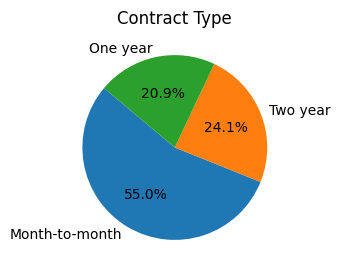

In [56]:
type_counts = df_contract['type'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Contract Type')
plt.show()

- The majority of contracts are on a month-to-month basis.  
- Contracts for one or two years account for approximately 20–24%

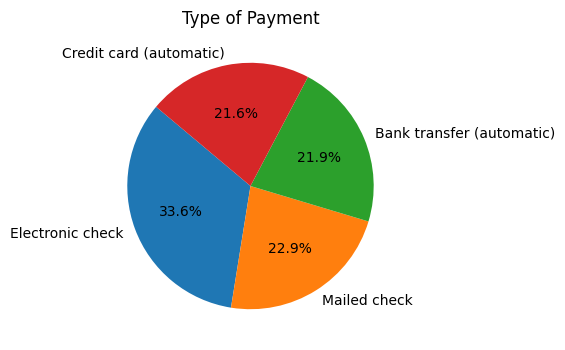

In [58]:
payment_method_counts = df_contract['payment_method'].value_counts()

plt.figure(figsize=(4, 4)) 
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Type of Payment')
plt.show()

- Most payments are made via electronic check, accounting for 33%.  
- Other payment methods make up approximately 22%

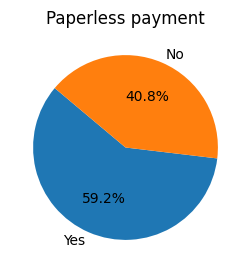

In [60]:
paperless_billing_counts = df_contract['paperless_billing'].value_counts()

plt.figure(figsize=(3, 3)) 
plt.pie(paperless_billing_counts, labels=paperless_billing_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Paperless payment')
plt.show()

- Most bills are issued in a paperless format, accounting for 60%

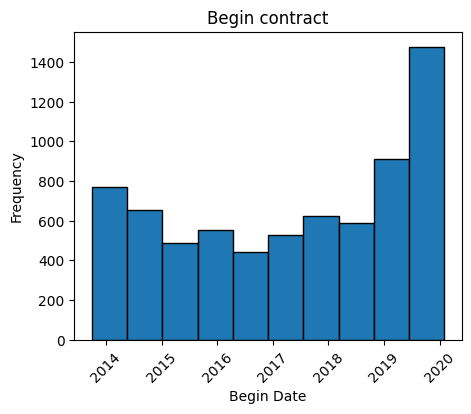

In [62]:
plt.figure(figsize=(5, 4))
plt.hist(df_contract['begin_date'], bins=10, edgecolor='black')
plt.title('Begin contract')
plt.xlabel('Begin Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

We can observe that contracts were signed between 2014 and 2020

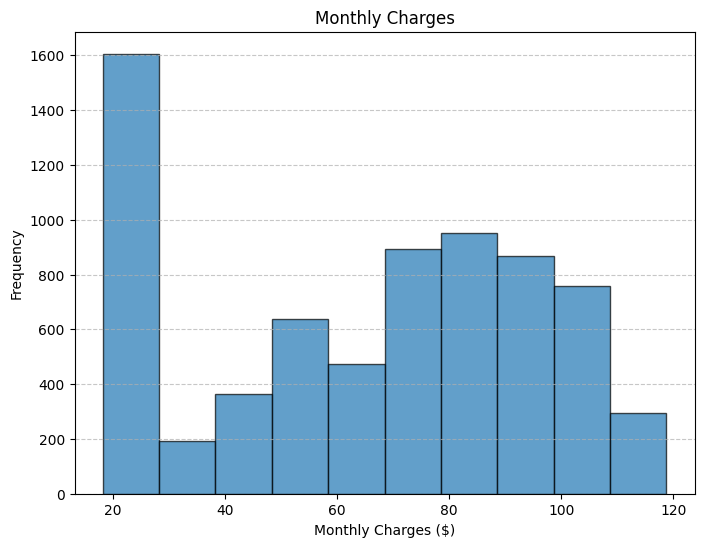

In [64]:
plt.figure(figsize=(8, 6))
plt.hist(df_contract['monthly_charges'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- The graph shows a strong concentration of customers with low expenses. The highest frequency is observed around 20 dollars, indicating a significant proportion of customers using only basic services.  
- Expenses in the 50–90 dollars range display a uniform distribution with lower frequency. This may be associated with customers utilizing multiple services or adding additional options.  
- In the 90–120 dollars range, the frequency decreases. This suggests fewer customers opt for expensive plans or additional services.  

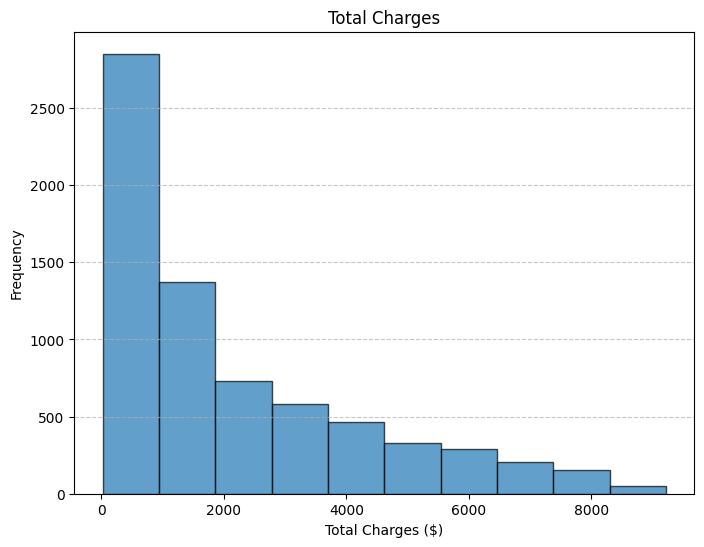

In [66]:
plt.figure(figsize=(8, 6))
plt.hist(df_contract['total_charges'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- We observe a high concentration of customers with low total expenses (ranging from 0 to 2,000 dollars).  
- The graph shows a decline in frequency as total expense values increase.  

### Dataset personal_new.csv

#### Data Preprocessing

In [70]:
df_personal.head(3)

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


In [71]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Examine the duplicates

In [73]:
print(df_personal.duplicated().sum())

0


and missing values 

In [75]:
missing_values = df_personal.isnull().sum()
print(missing_values)

customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64


**Analysis:**
- The dataset contains 7043 observations and 4 features, plus `customer_id`.  
- No missing values were detected.  
- Duplicate entries were checked, and none were found.  
- The column formats are correct

#### Exploratory Data Analysis

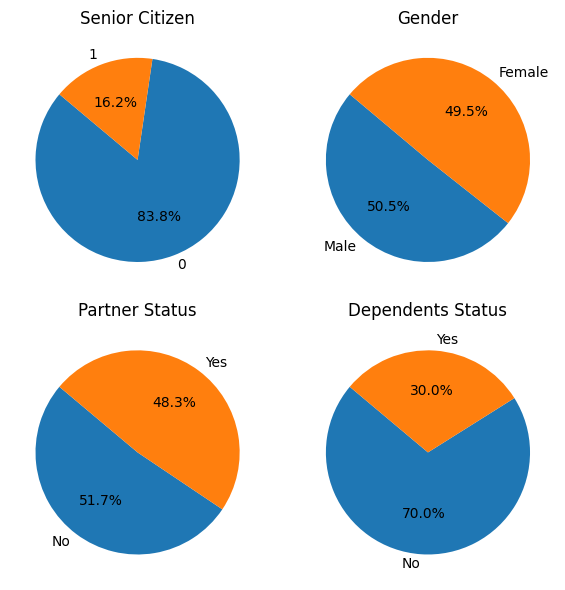

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6)) 

titles = ['Senior Citizen', 'Gender', 'Partner Status', 'Dependents Status']
columns_to_plot = ['senior_citizen', 'gender', 'partner', 'dependents']

for ax, column, title in zip(axes.flatten(), columns_to_plot, titles):
    counts = df_personal[column].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)

plt.tight_layout()
plt.show()

- We can observe that only 16% of the customers are elderly.  
- Gender distribution is nearly equal.  
- There is also an almost equal distribution regarding whether or not the customer has a partner.  
- For the feature indicating dependents, the majority (70%) do not have dependents

### Dataset internet_new.csv

#### Data Preprocessing

In [82]:
df_internet.head(3)

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No


In [83]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Checking the dupliactes 

In [85]:
print(df_internet.duplicated().sum())

0


and missing values 

In [87]:
missing_values = df_internet.isnull().sum()
print(missing_values)

customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64


**Analysis:**
- The dataset contains 5517 observations and 7 features, plus `customer_id`.  
- No missing values were detected.  
- Duplicate entries were checked, and none were found.  
- The column formats are correct

#### Exploratory Data Analysis

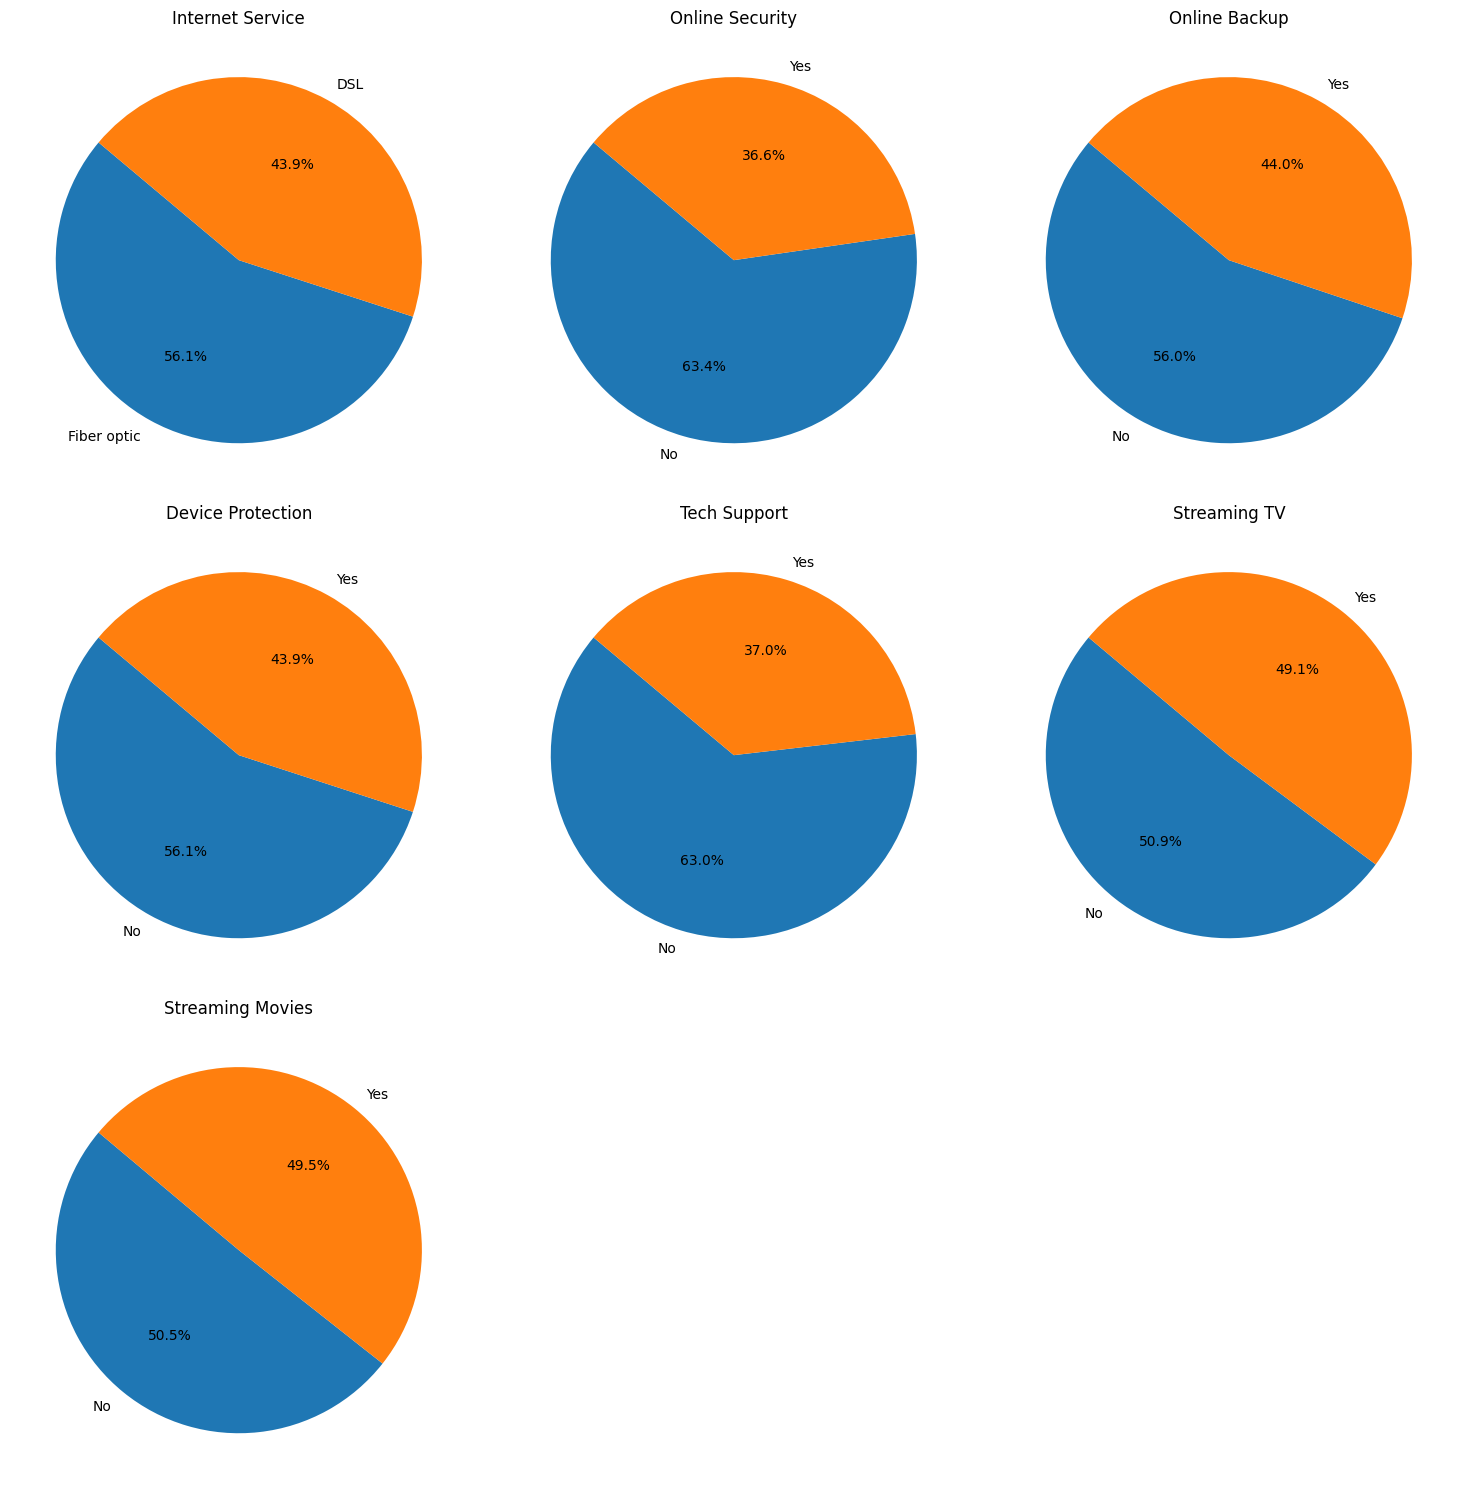

In [90]:
columns_to_plot = [
    'internet_service', 'online_security', 'online_backup', 
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]
titles = [
    'Internet Service', 'Online Security', 'Online Backup', 
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies'
]

fig, axes = plt.subplots(3, 3, figsize=(15, 15)) 

for ax, column, title in zip(axes.flatten(), columns_to_plot, titles):
    counts = df_internet[column].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)

for ax in axes.flatten()[len(columns_to_plot):]:
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

- The graph shows that 56% of users use a Fiber optic connection type, while 44% use DSL.  
- Website blocking for unsafe sites is activated by 36% of users.  
- Cloud storage for data backup is utilized by 44% of users.  
- Antivirus protection is available for 44% of users.  
- A dedicated technical support line is used by 37% of users.  
- Streaming TV is used by 49% of users.  
- The movie catalog is subscribed to by 50% of users

### Dataset phone_new.csv

#### Data Preprocessing

In [94]:
df_phone.head(3)

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No


In [95]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Checking the duplicates

In [97]:
print(df_phone.duplicated().sum())

0


and missing values 

In [99]:
missing_values = df_phone.isnull().sum()
print(missing_values)

customer_id       0
multiple_lines    0
dtype: int64


**Analysis:**
- The dataset contains 6361 observations and one feature, plus `customer_id`.  
- No missing values were detected.  
- Duplicate entries were checked, and none were found.  
- The column format is correct

#### Exploratory Data Analysis

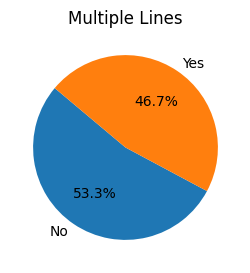

In [102]:
multiple_lines_counts = df_phone['multiple_lines'].value_counts()

plt.figure(figsize=(3, 3))  
plt.pie(multiple_lines_counts, labels=multiple_lines_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Multiple Lines')
plt.show()

47% of users have their phones connected to multiple lines simultaneously.

### Feature Analysis

1. **df_contract**:
   - All features are useful for training the model. They contain critical information about the customer's contract, such as payment type, expenses, and contract duration, which can directly influence the likelihood of churn.

2. **df_personal**:
   - The feature **gender** is not relevant, as the distribution between men and women is balanced, and there is no evidence suggesting that a customer's gender significantly impacts churn.  
   - Other features (SeniorCitizen, Partner, Dependents) are useful for analysis, as they reflect demographic and social factors that may influence customer behavior.

3. **df_internet**:
   - All features are useful for training the model. They provide detailed information about the type of connection, additional services (e.g., Online Security, Tech Support), and customer engagement, which are important for analyzing the likelihood of churn.

4. **df_phone**:
   - All features are useful for training the model. The feature **Multiple Lines** reflects the level of usage of telephony services and may be associated with customer loyalty.  

## Data Merge 

Merging the tables 

In [108]:
# exclude gender feature
df_personal = df_personal.drop(columns=['gender'])

# joining all tables based on customer_id 
df_combined = pd.merge(df_contract, df_personal, on='customer_id', how='outer')
df_combined = pd.merge(df_combined, df_internet, on='customer_id', how='outer')
df_combined = pd.merge(df_combined, df_phone, on='customer_id', how='outer')

df_combined.head(3)


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,0002-ORFBO,2019-05-01,No,One year,Yes,Mailed check,65.6,631.73,0,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,No
1,0003-MKNFE,2019-05-01,No,Month-to-month,No,Mailed check,59.9,539.10,0,No,No,DSL,No,No,No,No,No,Yes,Yes
2,0004-TLHLJ,2019-09-01,No,Month-to-month,Yes,Electronic check,73.9,406.45,0,No,No,Fiber optic,No,No,Yes,No,No,No,No


## Exploratory Data Analysis and Preprocessing of the Combined DataFrame

### Data Preprocessing 

In [111]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   senior_citizen     7043 non-null   int64         
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet_service   5517 non-null   object        
 12  online_security    5517 non-null   object        
 13  online_backup      5517 non-null   object        
 14  device_p

In [112]:
print(df_combined.duplicated().sum())

0


In [113]:
missing_values = df_combined.isnull().sum()
print(missing_values)

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64


**Analysis:**
- The dataset contains 7043 observations and 18 features, plus `customer_id`.  
- Missing values are present in the columns `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, and `streaming_movies`. The reason for these missing values is that customers without internet service are not included in the `df_internet` table. Since the service is absent, these missing values can be replaced with `"No"`.  
- Customers with missing values in the column `multiple_lines` (682 missing entries) likely do not use telephony services. These values can also be replaced with `"No"`.  
- The column `total_charges` has only 11 missing entries. These can be filled using the values from the `monthly_charges` column.  

In [115]:
columns_to_fill = ['internet_service', 'online_security', 'online_backup', 
                   'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']

df_combined[columns_to_fill] = df_combined[columns_to_fill].fillna('No')

In [116]:
df_combined['total_charges'] = df_combined['total_charges'].fillna(df_combined['monthly_charges'])

In [117]:
missing_values = df_combined.isnull().sum()
print(missing_values)

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64


Replace the values `1` and `0` in the `senior_citizen` feature with `"Yes"` and `"No"`, respectively, to ensure the feature is later treated as categorical

In [119]:
df_combined['senior_citizen'] = df_combined['senior_citizen'].replace({0: 'No', 1: 'Yes'})
print(df_combined['senior_citizen'].value_counts())

senior_citizen
No     5901
Yes    1142
Name: count, dtype: int64


### Feature Engineering 

From the `BeginDate` and `EndDate` columns, we can create two new features:

1. **`duration`**:  
   - The duration of the contract in days (calculated as the number of days from the contract start date `BeginDate` to the end date `EndDate`).  
   - If the customer is still using the services (`EndDate` is `"No"`), the current date can be used to calculate the duration.

2. **`churn`** (binary churn indicator):  
   - If `EndDate` is `"No"`, the customer is active (value `0`).  
   - If a specific date is given in `EndDate`, the contract is terminated (value `1`).  

In [122]:

# converting EndDate to datetime
df_combined['end_date'] = df_combined['end_date'].replace("No", pd.NaT)  # Заменяем "No" на NaT (Not a Time)
df_combined['end_date'] = pd.to_datetime(df_combined['end_date'])

# creation of duration feature (contract duration in days)
# If EndDate is missing (NaT), use current date 
current_date = pd.to_datetime("2020-02-01")  
df_combined['duration'] = (df_combined['end_date'].fillna(current_date) - df_combined['begin_date']).dt.days

# create feature churn
# cotract is active (churn = 0), contract is terminated (churn = 1)
df_combined['churn'] = df_combined['end_date'].notna().astype(int)


print(df_combined[['begin_date', 'end_date', 'duration', 'churn']].head())


  begin_date end_date  duration  churn
0 2019-05-01      NaT       276      0
1 2019-05-01      NaT       276      0
2 2019-09-01      NaT       153      0
3 2018-12-01      NaT       427      0
4 2019-09-01      NaT       153      0


**Conclusion**

**`Churn` is the target feature.**  
The task of the telecommunications operator is to identify customers who are most likely to terminate their contracts. The feature `churn` encodes this information:  
- `churn = 0`: The customer continues to use the services.  
- `churn = 1`: The customer has terminated the contract.  

The model will be trained on other features to predict the value of `churn`. This will enable the telecommunications operator to proactively identify customers prone to churn

The `begin_date` and `end_date` data are not relevant for training and can be removed

In [125]:
df_combined = df_combined.drop(columns=['begin_date', 'end_date'])

### Exploratory Data Analysis

Examine new features 

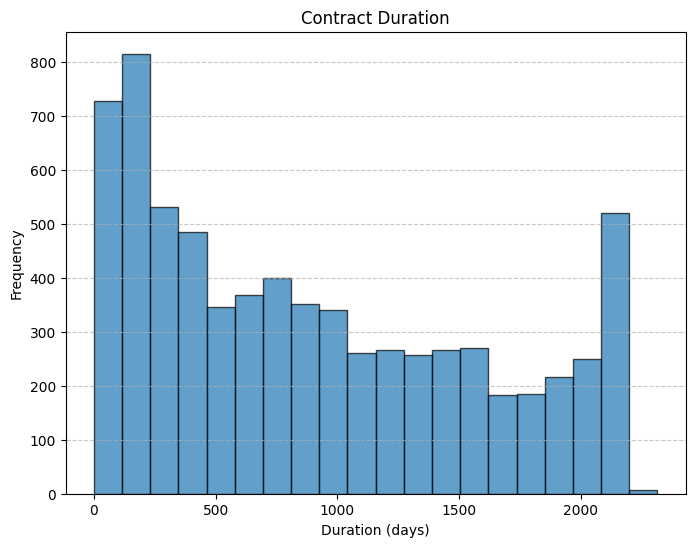

In [128]:
plt.figure(figsize=(8, 6))
plt.hist(df_combined['duration'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Contract Duration')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- The graph shows that a large proportion of customers have short contract durations.  
- The main peak is observed in the range of 0–500 days, with the highest value around 800 days.  
- This may indicate that a significant portion of customers are relatively new or have short-term contracts. It is already known that most customers have month-to-month contracts. These customers may be more prone to churn as they have not yet developed loyalty to the operator.  
- In the range of 500 to 1500 days, the frequency is more evenly distributed, with values around 300–400.  
- Around 2000 days, another peak is observed with a frequency of about 500. These are customers with long-term contracts, who are likely the most loyal and least prone to churn.  

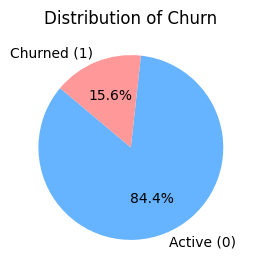

In [130]:
churn_counts = df_combined['churn'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(churn_counts, labels=['Active (0)', 'Churned (1)'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Churn')
plt.show()



- The graph shows that 84.4% of customers continue to use the company's services.  
- The majority of customers remain loyal to the telecommunications operator.  
- 15.6% of customers have terminated their contracts, highlighting the need for developing customer retention strategies.  

**Class Balance**:  
- The `churn` feature is imbalanced, as one category significantly outweighs the other.  
- When training the model, this imbalance may lead to prediction bias towards the majority class

### Correlation Analysis

Let's start by examining the interactions between features.  
We will construct a correlation matrix to analyze the relationships between features

In [134]:
df_combined = df_combined.set_index('customer_id')

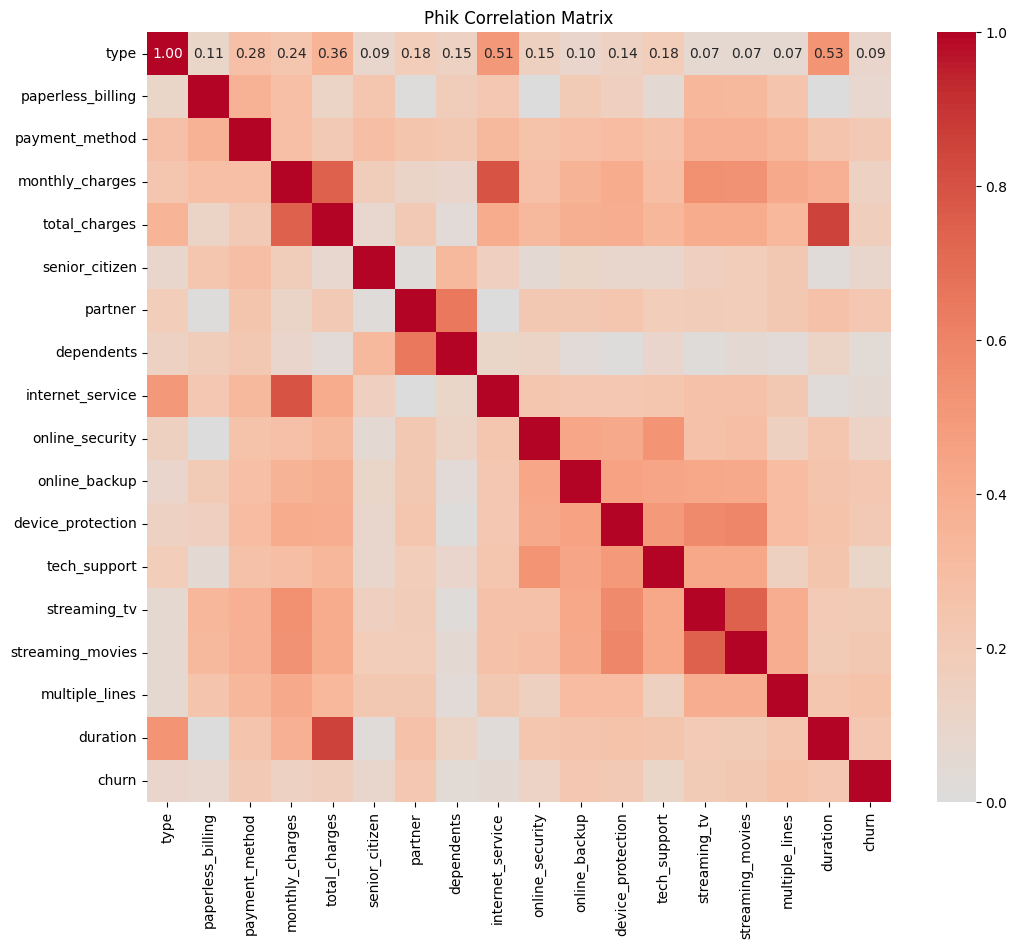

In [135]:
interval_cols = ['monthly_charges', 'total_charges', 'duration']


# number of bins for interval col
bins = {
    'monthly_charges': 5,
    'total_charges': 5,
    'duration': 5,
}

# calculate phik 
phik_matrix = df_combined.phik_matrix(interval_cols=interval_cols, bins=bins)

# visual matrix 
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Phik Correlation Matrix")
plt.show()

In [136]:
display(phik_matrix)

,type,paperless_billing,payment_method,monthly_charges,total_charges,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,duration,churn
type,1.000000,0.106860,0.277462,0.238576,0.355137,0.086231,0.179736,0.147680,0.505187,0.152145,0.098884,0.137610,0.179999,0.066961,0.069608,0.065498,0.525441,0.094015
paperless_billing,0.106860,1.000000,0.370495,0.286875,0.123508,0.242133,0.013218,0.172593,0.231438,0.000000,0.196443,0.160796,0.055929,0.343524,0.325551,0.252972,0.000000,0.083398
payment_method,0.277462,0.370495,1.000000,0.285340,0.214287,0.292725,0.243008,0.224903,0.323886,0.262911,0.282475,0.306866,0.272101,0.377209,0.378907,0.339313,0.251915,0.214832
monthly_charges,0.238576,0.286875,0.285340,1.000000,0.743923,0.173521,0.112042,0.100616,0.790972,0.276009,0.363550,0.405946,0.294312,0.539293,0.537369,0.421389,0.377175,0.140620
total_charges,0.355137,0.123508,0.214287,0.743923,1.000000,0.079694,0.214849,0.033319,0.401135,0.320572,0.386316,0.397059,0.339268,0.399952,0.402600,0.329854,0.852888,0.168004
senior_citizen,0.086231,0.242133,0.292725,0.173521,0.079694,1.000000,0.016992,0.324576,0.160702,0.057028,0.102065,0.090686,0.092565,0.163120,0.186141,0.221313,0.027470,0.086159
partner,0.179736,0.013218,0.243008,0.112042,0.214849,0.016992,1.000000,0.652122,0.000000,0.221673,0.219223,0.238079,0.185993,0.193258,0.182011,0.220101,0.272507,0.226688
dependents,0.147680,0.172593,0.224903,0.100616,0.033319,0.324576,0.652122,1.000000,0.108463,0.124945,0.031533,0.010416,0.096912,0.017331,0.058999,0.033103,0.118461,0.046871
internet_service,0.505187,0.231438,0.323886,0.790972,0.401135,0.160702,0.000000,0.108463,1.000000,0.241421,0.233602,0.232916,0.239663,0.272818,0.272782,0.225383,0.026601,0.056621
online_security,0.152145,0.000000,0.262911,0.276009,0.320572,0.057028,0.221673,0.124945,0.241421,1.000000,0.430425,0.418474,0.528391,0.272186,0.289097,0.151886,0.240562,0.132594


- There is a strong correlation between `monthly_charges` and `total_charges` (0.74). This can be explained by the fact that total charges are the sum of monthly payments over a certain period. One of these features could be excluded, as they contain redundant information.  
- The correlation between `internet_service` and `monthly_charges` (0.79) indicates that customers with expensive internet services tend to have higher monthly payments.  
- The contract duration (`duration`) and `total_charges` are closely related, as the duration directly impacts the total amount of payments.  

Lets remove `monthly_charges`

In [139]:
df_combined = df_combined.drop(columns=['monthly_charges'])

Check the dupliactes after feature removal 

In [141]:
print(df_combined.duplicated().sum())

15


Delete the duplicates

In [143]:
shape_before = df_combined.shape
print(shape_before)
df_combined = df_combined.drop_duplicates()
shape_after = df_combined.shape
print(shape_after)


(7043, 17)
(7028, 17)


## Data Preparation

At this stage, we will take the following steps:

1. **Split the Dataset**:
   - Divide the dataset into training and test sets.
   - The target feature is `churn` (customer churn).

2. **Process Numerical and Categorical Features in a Pipeline**:
   - For **numerical features**, apply `StandardScaler()` and `MinMaxScaler()` for normalization and scaling.  
   - For **categorical features**, use `OneHotEncoder` to encode categorical data.  

Split the data into two sets

In [147]:
X = df_combined.drop(['churn'], axis=1)
y = df_combined['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y
)

Define the numerical and categorical features.

In [149]:
numerical_features = ['total_charges', 'duration']
categorical_features = ['type', 
                        'paperless_billing', 
                        'payment_method', 
                        'senior_citizen', 
                        'partner', 
                        'dependents', 
                        'internet_service', 
                        'online_security',
                        'online_backup',
                        'device_protection', 
                        'tech_support',
                        'streaming_tv',
                        'streaming_movies', 
                        'multiple_lines'
                       ]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)



## Training Machine Learning Models

### Training the model on the training set.

1. **Prepare the Final Pipeline and Parameter Dictionary**:  
   - Set up pipelines for the following models:  
     - `DecisionTreeClassifier()`
     - `LogisticRegression()`
     - `RandomForestClassifier()`
     - `LGBMClassifier()`  
   - Include hyperparameters for each model in the dictionary for optimization.

2. **Evaluation Metric**:  
   - Use **ROC AUC** as the performance metric for model evaluation.  

In [153]:

# Create the final pipeline: data preparation and model.

pipe_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

param_grid = [
    # Parameters for DecisionTreeClassifier
    {
        'classifier': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'classifier__max_depth': range(2, 20),
        'classifier__max_features': range(1, X_train.shape[1] + 1),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # Parameters for LogisticRegression
    {
        'classifier': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')],
        'classifier__C': np.logspace(-5, 5, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }, 
   # Parameters for RandomForestClassifier
    {
    'classifier': [RandomForestClassifier(random_state=RANDOM_STATE)],
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
}, 
    # Parameters for LGBMClassifier
    {
    'classifier': [LGBMClassifier(random_state=RANDOM_STATE)],
    'classifier__num_leaves': [20, 31, 40],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [-1, 5, 10],
    'classifier__min_child_samples': [20, 30, 50],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}
]

In [154]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)


randomized_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 826, number of negative: 4445
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 5271, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156707 -> initscore=-1.682940
[LightGBM] [Info] Start training from score -1.682940
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['total_charges',
                                                                                'duration']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['type',
                                                                                'paper...
                                        {'classifier': [LGBMClassifier(random_state=251124)],
                                         'classifier__colsample_bytree': [0.8,
                                                                          1.0],
                                         'classifier__learning_rate': [0.01,
                                                                       0.05,
                                                                       0.1],
                                         'classifier__max_depth': [-1, 5, 10],
                                         'classifier__min_child_samples': [20,
                                                                           30,
                                                                           50],
                                         'classifier__n_estimators': [100, 200,
                                                                      300],
                                         'classifier__num_leaves': [20, 31, 40],
                                         'classifier__subsample': [0.8, 1.0]}],
                   random_state=251124, scoring='roc_auc')

### Analysis of the Best Model and Metrics on the Validation Set

In [156]:
print('Best Model and Its Parameters:\n\n', randomized_search.best_estimator_) 

Best Model and Its Parameters:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['total_charges',
                                                   'duration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown

In [157]:
print('ROC-AUC for the best model:\n', randomized_search.best_score_)

ROC-AUC for the best model:
 0.8731331091828199


The ROC-AUC metric for the best model was **0.87**, indicating a good ability of the model to distinguish between classes (churn and active customers).  
The **LGBMClassifier** was selected as the optimal model because it demonstrated the best performance on the ROC-AUC metric during hyperparameter tuning

### Testing the model on the test set.

In [160]:
# saving the best model 
best_model = randomized_search.best_estimator_
#predict on test set 
y_test_proba = best_model.predict_proba(X_test)[:, 1]

#calculate metric 
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f'ROC AUC Score: {roc_auc:.3f}')

ROC AUC Score: 0.902


- The **LGBMClassifier** model achieved the best result on the test set, reaching an ROC-AUC score of **0.902**.  
- The use of this algorithm allowed for capturing nonlinear relationships between features and efficiently processing the data, resulting in improved prediction quality.

## Analysis of Model Performance

### Feature Importance Analysis

We will evaluate feature importance for the best model and create a feature importance plot using the SHAP method.

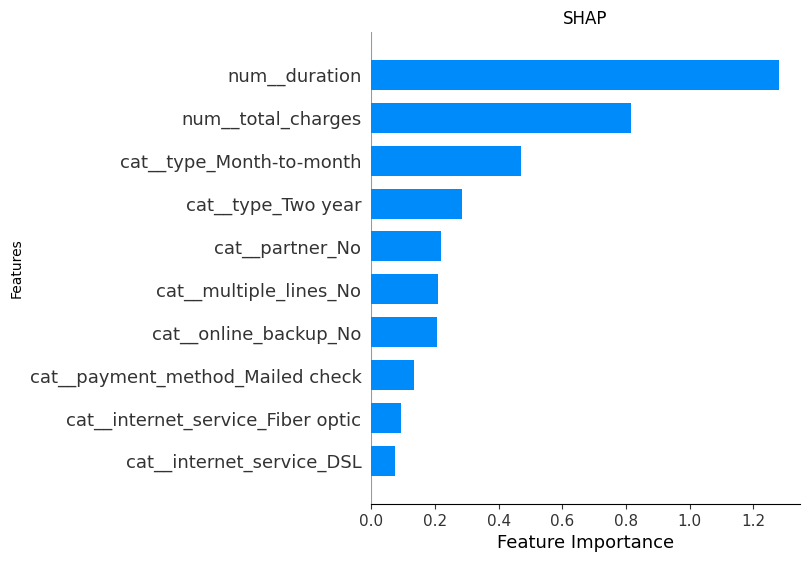

In [165]:
# Save the processing steps into separate variables.
model = randomized_search.best_estimator_.named_steps['classifier']
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

# Process the training and test sets using the pipeline.
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# initiate SHAP 
explainer = shap.Explainer(model, X_train_preprocessed)
shap_values = explainer.shap_values(X_test_preprocessed, check_additivity=False)

# create the SHAP feature importance plot
fig, ax = plt.subplots(figsize=(10, 10))
shap.summary_plot(shap_values, X_test_preprocessed, 
                  feature_names=preprocessor.get_feature_names_out(), 
                  plot_type="bar", max_display=10, show=False)
ax.set_title("SHAP")
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Features")
plt.show()

Based on the SHAP feature importance plot, the following conclusions can be drawn:

- **`duration` (contract duration)**:  
  This feature has the greatest influence on the model's prediction. Contract duration is a key indicator of whether a customer will stay or leave, as long-term customers are less likely to churn.

- **`Month-to-month` (contract type - month-to-month)**:  
  Customers with month-to-month contracts significantly impact churn predictions, as these customers have more flexibility and can quickly discontinue services.

- **`multiple_lines_Yes` and `multiple_lines_No`**:  
  The presence of multiple phone lines also has a strong influence. Customers with multiple lines are typically more engaged with the company’s services, reducing their likelihood of churn.

- **`total_charges`**:  
  The total customer expenditure is important, as it reflects their level of engagement with the service.

- **`Two year` (contract type - two years)**:  
  Two-year contracts have noticeable influence, as long-term contracts generally indicate higher loyalty.

- **`cat__partner_Yes` and `cat__partner_No`**:  
  Having a spouse or partner also impacts churn. This may be because customers with a partner are more likely to stay, possibly due to shared family interests.

- **`device_protection_No` and `online_backup_No`**:  
  The absence of device protection or backup services is associated with higher churn likelihood, possibly due to lower customer engagement with additional services.

---

### **Conclusion**

Key features influencing customer churn are associated with:  
- **Contract type and duration.**  
- **Additional services**, such as multiple lines, device protection, and backup services.  
- **Personal characteristics**, such as having a partner.  

### Confusion Matrix 

In [168]:
y_test_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

print("Confusion Matrix:")
print(cm_df)


Confusion Matrix:
      0    1
0  1449   33
1   152  123


**Key Findings:**

- The class "Contract Termination" (`churn = 1`) is much less common than "Did Not Terminate" (`churn = 0`).  
- This imbalance is likely due to a significant class imbalance in the training set, where the majority of data belongs to class `0` (as mentioned earlier).  
- The **False Negatives** indicate that the model underestimates the likelihood of churn (`churn = 1`).  

## Final Conclusions of the Project

### Steps Taken 

**The following steps were performed in the project:**
- Loading, exploring, and merging data from different datasets.
- Handling missing values and performing exploratory data analysis (correlation).
- Creating a pipeline for data preprocessing and model training.
- Conducting hyperparameter tuning using `RandomizedSearchCV`.
- Building and analyzing the **RandomForestClassifier** model.
- Evaluating model quality using the **ROC-AUC** metric.
- Analyzing feature importance using SHAP and reviewing model performance through a confusion matrix.

---

**Uncompleted Points:**

**Class Imbalance:**
  - **Issue**: The model rarely predicted the class `churn = 1`.

---

**Challenges Encountered During the Project:**

- **Missing Values:**
  - **Issue**: The `total_charges` feature contained missing values.
  - **Solution**: Filled missing values with data from `monthly_charges`.

- **Low Initial Performance**:
  - **Issue**: The model showed insufficient accuracy in the first attempts (ROC-AUC = 0.74, 0.82).
  - **Solution**: Adjusted hyperparameters and incorporated additional models.

---

**Key Steps in Solving the Problem**

1. **Preliminary Data Processing**:
   - Handling missing values and selecting numerical/categorical features.
   - Creating new features, including the target feature.

2. **Model Setup**:
   - Conducting hyperparameter tuning to select the best model.
   - Selecting additional models for comparison.

3. **Model Interpretation**:
   - Using SHAP for feature importance analysis.
   - Addressing class imbalance through a confusion matrix.

---

**Final Model**

- **Final Model**:  
  - **LGBMClassifier**  

- **Hyperparameters**:  
  - `learning_rate=0.05`
  - `max_depth=5`
  - `min_child_samples=30`
  - `n_estimators=300`
  - `num_leaves=20`

- **Performance**:  
  - **ROC-AUC** on the test set: **0.902**.

---

**Features Used for Training the Best Model**

1. **Numerical Features**:
   - `total_charges`: Missing values were filled with data from `monthly_charges` and scaled.
   - `duration`: Created from `begin_date` and `end_date`, then scaled.
   - `monthly_charges`: Removed after merging due to strong correlation with `total_charges`.

2. **Categorical Features**:
   - `churn`: Target feature created from `end_date`.
   - `type`: OneHotEncoded.
   - `paperless_billing`: OneHotEncoded.
   - `payment_method`: OneHotEncoded.
   - `senior_citizen`: Encoded as `Yes/No` and then OneHotEncoded.
   - `partner`: OneHotEncoded.
   - `dependents`: OneHotEncoded.
   - Internet services: `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`—all OneHotEncoded.
   - Telephony services: `multiple_lines`—OneHotEncoded.

---

**Conclusion**

The final **RandomForestClassifier** model achieved a ROC-AUC of **0.807**, which is a good result for the task of predicting customer churn. Using SHAP, we identified key features such as contract duration and payment type, which have the greatest influence on the model's decisions.

---

**Further Actions to Improve Model Quality:**
- Address class imbalance (e.g., using SMOTE).
- Create additional features.
- Experiment with other algorithms (e.g., CatBoost, LightGBM).
- Test on new data.
- Optimize the target metric.

### Business Recommendations

**Recommendations for Customer Management**

1. **Segmentation of High-Risk Customers**:
   - Use the model to identify customers with a high likelihood of churn.
   - Proactively target these customers with special offers or incentives.

2. **Customer Retention Programs**:
   - **Personalized Promo Codes and Discounts**:
     - For customers with short contract durations (`duration`) and monthly payment types (`type = "Month-to-month"`), offer discounts for contract renewal or transitioning to more cost-effective annual plans.
   - **Enhancement of Internet Services**:
     - Customers without enabled options like `OnlineSecurity`, `DeviceProtection`, or `TechSupport` are at higher risk of churn. Offer free trials or special promotions for these services to boost engagement.

3. **Customer Behavior Analysis**:
   - Customers who use additional services, such as `StreamingTV` or `StreamingMovies`, are less likely to churn.
   - Promote these services more actively among customers who do not currently use them.

4. **Optimization of Tariffs**:
   - Customers with high monthly charges (`total_charges / duration`) may be cost-sensitive.
   - Offer these customers packages with more favorable terms to reduce churn risk.

5. **Improvement of Technical Support**:
   - Customers without `TechSupport` are more likely to terminate their contracts.
   - Analyze how enhancing technical support can reduce churn and improve customer satisfaction.

---

**Expected Results**:
- Reduced customer churn through timely risk management.
- Increased customer loyalty through personalized offers.
- Higher revenue by lowering the costs of acquiring new customers and retaining existing ones.

These recommendations will help "TeleDom" not only effectively combat churn but also improve customer service quality, creating a competitive advantage in the market.